In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_excel('test_sample_medical.xlsx')

# EDA

In [3]:
df.head()

,Пол,Дата рождения,Наименование услуги,Кол-во услуг,Дата услуги,Код диагноза,unique_insured_id,case_id,service_class
0,Ж,21.09.1965,"Прием (осмотр, консультация) врача-невролога п...",1,13.08.2018,G43.0,0,0,1231
1,Ж,21.09.1965,"Прием (осмотр, консультация) врача-невролога, ...",1,06.08.2018,G44.2,0,0,5101
2,Ж,21.09.1965,Эхокардиография с физической нагрузкой,1,24.07.2018,I20.9,0,0,4400
3,Ж,21.09.1965,Холтеровское мониторирование сердечного ритма ...,1,17.07.2018,I20.9,0,0,4100
4,Ж,21.09.1965,Маммография (двух молочных желез ),1,14.08.2018,N64.4,0,0,4210


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165401 entries, 0 to 165400
Data columns (total 9 columns):
Пол                    165401 non-null object
Дата рождения          165401 non-null object
Наименование услуги    165401 non-null object
Кол-во услуг           165401 non-null int64
Дата услуги            165401 non-null object
Код диагноза           90973 non-null object
unique_insured_id      165401 non-null int64
case_id                165401 non-null int64
service_class          165401 non-null int64
dtypes: int64(4), object(5)
memory usage: 11.4+ MB


In [5]:
df.columns = ['gender', 'birthday', 'service', 'num', 'date', 'diagnosis', 'insured_id', 'case_id', 'service_class']

In [6]:
df['birthday'] = pd.to_datetime(df['birthday'])
df['date'] = pd.to_datetime(df['date'])
df['birthday_year'] = df['birthday'].dt.year

In [7]:
df.head()

,gender,birthday,service,num,date,diagnosis,insured_id,case_id,service_class,birthday_year
0,Ж,1965-09-21,"Прием (осмотр, консультация) врача-невролога п...",1,2018-08-13,G43.0,0,0,1231,1965
1,Ж,1965-09-21,"Прием (осмотр, консультация) врача-невролога, ...",1,2018-06-08,G44.2,0,0,5101,1965
2,Ж,1965-09-21,Эхокардиография с физической нагрузкой,1,2018-07-24,I20.9,0,0,4400,1965
3,Ж,1965-09-21,Холтеровское мониторирование сердечного ритма ...,1,2018-07-17,I20.9,0,0,4100,1965
4,Ж,1965-09-21,Маммография (двух молочных желез ),1,2018-08-14,N64.4,0,0,4210,1965


In [8]:
df['diagnosis'].isna().value_counts()

False    90973
True     74428
Name: diagnosis, dtype: int64

In [9]:
df['diagnosis'].isna().value_counts(normalize=True)

False    0.550015
True     0.449985
Name: diagnosis, dtype: float64

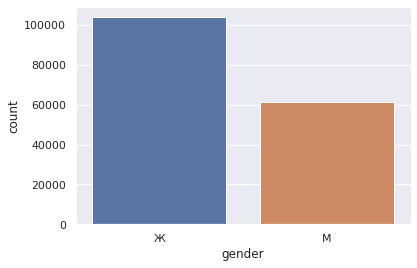

In [10]:
sns.countplot(x='gender', data=df);

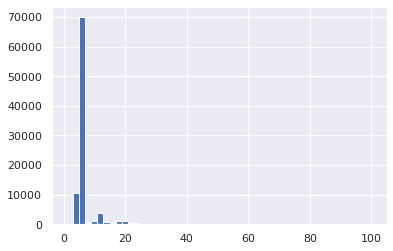

In [11]:
# Длина строки диагноза
df['diagnosis'].str.len().hist(bins=50);

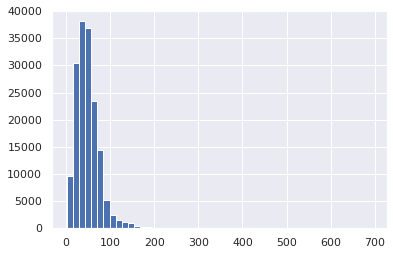

In [12]:
# Длина строки сервиса
df['service'].str.len().hist(bins=50);

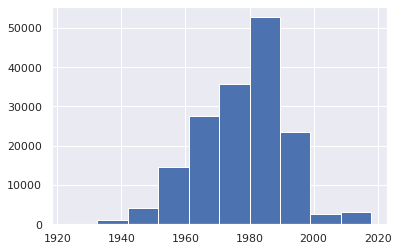

In [13]:
df['birthday_year'].hist();

In [14]:
df['date'].dt.year.value_counts()

2018    165401
Name: date, dtype: int64

In [15]:
df['num'].value_counts()

1     159929
2       3118
3        590
4        357
28       252
20       153
5        110
10       110
8         75
6         73
26        64
14        50
12        47
7         44
24        43
27        41
30        37
23        32
16        25
25        25
18        25
9         23
15        22
19        21
22        19
29        18
31        17
11        16
13        15
17        13
32        12
39        10
21         8
46         1
50         1
51         1
40         1
67         1
43         1
68         1
Name: num, dtype: int64

In [16]:
df['insured_id'].value_counts()

5446     219
8295     167
3975     122
1867     121
17360    121
        ... 
14760      1
9461       1
6700       1
7410       1
2047       1
Name: insured_id, Length: 19058, dtype: int64

In [17]:
df['case_id'].value_counts()

7103     219
10521    167
20778    121
11524    106
971      106
        ... 
7653       1
20641      1
5604       1
9698       1
16951      1
Name: case_id, Length: 22664, dtype: int64

In [19]:
# Проверяем догадку о том, что case_id — это уникальный человек
df.groupby('case_id')['birthday'].nunique().value_counts()

1    22664
Name: birthday, dtype: int64

In [20]:
df['service'].nunique(), df['service_class'].nunique()

(19381, 203)

In [21]:
df.groupby('service_class')['service'].nunique()

service_class
0        80
1001    168
1002     26
1010      9
1020      6
       ... 
8430     12
8440      2
8500     18
8502      2
8510     36
Name: service, Length: 203, dtype: int64

In [23]:
df['insured_id'].value_counts()

5446     219
8295     167
3975     122
1867     121
17360    121
        ... 
14760      1
9461       1
6700       1
7410       1
2047       1
Name: insured_id, Length: 19058, dtype: int64

### Выводы

- В одной строке может быть указан не один диагноз. Что делать в этом случае? Ответ: считать верным любой из указанных.
- num — количественная мера услуги (пример: кол-во вылеченных зубов, кол-во наложенных повязок)
- insured_id — уникальный человек, не нужен
- case_id — набор услуг, проведенных за короткий промежуток времени, бесполезен для модели
- Дату проведения услуги можно убрать, она бесполезна и будет только мешать
- service_class может пригодиться, доп. информация к описанию услуги
- У 55% данных отсутствуют метки, возможно следует применить semi-supervised learning
- Полезные признаки: gender, birthday, service, num, service_class